## 4.1 FFT Sample

In [1]:
import numpy as np
from numpy.fft import fft, ifft

x = np.array( [ 1, 2, 4, 4 ] )
X = fft( x )
xx = ifft ( X )

print( "x =", x )
print( "X =", X )
print( "Inverse FFT of X =", xx )

x = np.array( [ 1, 2, 4, 4 ] )
X = fft( x )
X[2]=0
xx = ifft ( X )

print( "x =", x )
print( "X =", X )
print( "Inverse FFT of X =", xx )

x = [1 2 4 4]
X = [11.+0.j -3.+2.j -1.+0.j -3.-2.j]
Inverse FFT of X = [1.+0.j 2.+0.j 4.+0.j 4.+0.j]
x = [1 2 4 4]
X = [11.+0.j -3.+2.j  0.+0.j -3.-2.j]
Inverse FFT of X = [1.25+0.j 1.75+0.j 4.25+0.j 3.75+0.j]


## 4.2 Fourier Spectrum

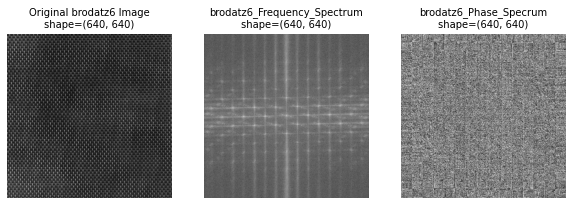

In [2]:
import numpy as np
import cv2
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = np.log( np.abs( Fshift ) + 1 )
    #mag = np.abs( Fshift )
    mag = mag / mag.max( ) * 255.0 
    g = np.uint8( mag )
    return g

def phase_spectrum( f ):
    F = fft2( f )
    phase = np.angle( F, deg = True )
    nr, nc = phase.shape[:2]
    for x in range( nr ):
        for y in range( nc ):
            if phase[x,y] < 0:
                phase[x,y] = phase[x,y] + 360
            phase[x,y] = int( phase[x,y] * 255 / 360 )
    g = np.uint8( np.clip( phase, 0, 255 ) )
    return g
    
def main( ):
    img = cv2.imread( "brodatz6.bmp", -1 )
    magnitude = spectrum( img )
    phase = phase_spectrum( img ) 
    
    display_fig_names = [
    "Original brodatz6 Image\nshape={}".format(img.shape),
    "brodatz6_Frequency_Spectrum\nshape={}".format(magnitude.shape),
    "brodatz6_Phase_Specrum\nshape={}".format(phase.shape),       
    ]
    display_img = [img, magnitude, phase]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])    

main( )

## 4.3 Fourier Ideal highpass filter

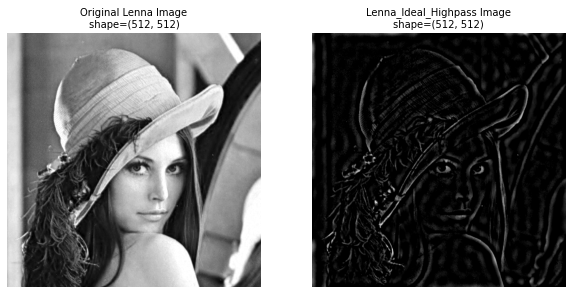

In [3]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def frequency_ideal_highpass( f , D0):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete-Fourier Transform
    G = F.copy( )

    # Ideal High-pass filter
    for u in range( nr ):
        for v in range( nc ):
            dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) + ( v - nc / 2 ) * ( v - nc / 2 ) )
            if dist <= D0:
                G[u,v] = 0

    gp = ifft2( G ) # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] ) # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    cutoff = 20
    img2 = frequency_ideal_highpass(img, cutoff)
   
    display_fig_names = [
    "Original Lenna Image\nshape={}".format(img.shape),
    "Lenna_Ideal_Highpass Image\nshape={}".format(img2.shape),  
    ]
    display_img = [img, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])        
main( )

## <font color="Red">4.4 Please finish ideal lowpass filter by referencing the code given in 4.3


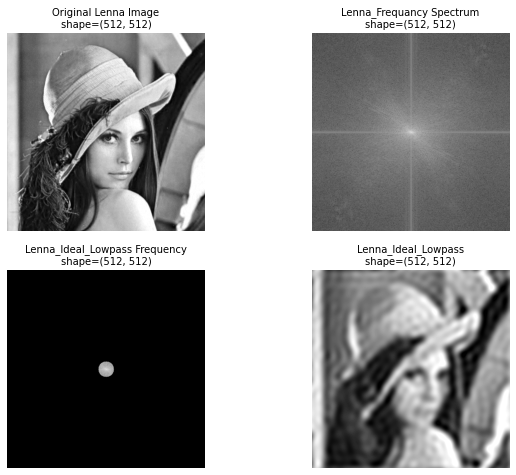

In [ ]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def frequency_ideal_lowpass( f , D0):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete-Fourier Transform
    G = F.copy( )

    # Ideal Low-pass filter
# -------------- Code Here ------------- #
    for i in range(nr):
        for j in range(nc):
            dist=np.sqrt((i-nr)*(i-nr/2)*(j-nc/2)*(j-nc/2))
            if dist>=D0:
                G[i,j]=0

    gp = ifft2( G ) 

    gp2 = np.zeros( [ nr, nc ],dtype=np.float64)
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )
    
    F = np.log(np.abs(F) + 1)
    G = np.log(np.abs(G) + 1)
# -------------- Stop Here ------------- #
    return F, G, g

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    cutoff = 20
    [imgFrequency, filterFrequency, filterResult] = frequency_ideal_lowpass(img, cutoff)

    display_fig_names = [
    "Original Lenna Image\nshape={}".format(img.shape),
    "Lenna_Frequancy Spectrum\nshape={}".format(imgFrequency.shape),  
    "Lenna_Ideal_Lowpass Frequency\nshape={}".format(filterFrequency.shape), 
    "Lenna_Ideal_Lowpass\nshape={}".format(filterResult.shape), 
    ]
    display_img = [img, imgFrequency, filterFrequency, filterResult]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 2, i+1)
        plot_image(display_img[i], title=display_fig_names[i])    
        
main( )

## <font color="Red">4.5 Please finish the Gaussian lowpass filter and Butterworth lowpass filter: </font><p>
https://weichengan.com/2023/02/17/suibi/image_lowpass_filtering/    
#### Gaussian low-pass filter：<p>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*MgKiArdR-rpQbliBA9yGVg.png" width=300> <p>
#### Butterworth high-pass filter：  
<img src="https://epochabuse.com/wp-content/uploads/2020/12/butterworth-highpass-filter-formula-680x148.png" width=300>


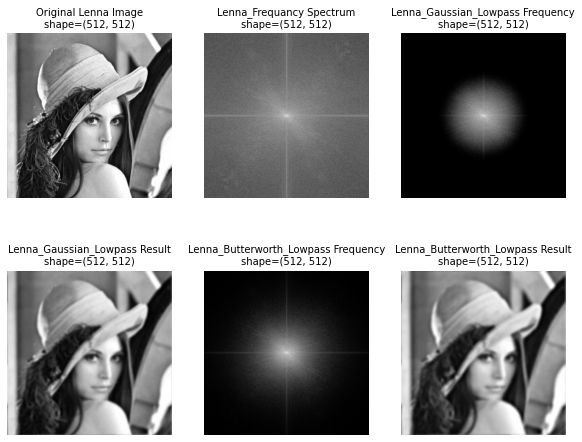

In [ ]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def frequency_Gaussian_lowpass( f, D0):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-Processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete Fourier Transform
    H = F.copy( )
#------------------------- Code Here ------------------------------   
    H = np.zeros_like(F)
    for i in range(nr):
        for j in range(nc):
            dist = np.sqrt((i - nr / 2) ** 2 + (j - nc / 2) ** 2)
            H[i, j] = np.exp(-dist * dist / (2 * D0 * D0))

    G = H * F
    gp = ifft2(G) # Inverse Discrete Fourier Transform

    gp2 = np.zeros([nr, nc]) # Post-Processing
    for x in range(nr):
        for y in range(nc):
            gp2[x, y] = round(pow(-1, x + y) * np.real(gp[x, y]), 0)
    g = np.uint8(np.clip(gp2, 0, 255))
#------------------------- Stop Here ------------------------------  
    return F, H, g

def frequency_Butterworth_lowpass( f, D0, order ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-Processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete Fourier Transform
    H = F.copy( )
#------------------------- Code here ------------------------------    
    for i in range(nr):
        for j in range(nc):
            dist = np.sqrt((i - nr / 2) ** 2 + (j - nc / 2) ** 2)
            H[i, j] = 1 / (1 + pow(dist / D0, 2 * order))

    G = H * F
    gp = ifft2(G) # Inverse Discrete Fourier Transform

    gp2 = np.zeros([nr, nc]) # Post-Processing
    for x in range(nr):
        for y in range(nc):
            gp2[x, y] = round(pow(-1, x + y) * np.real(gp[x, y]), 0)
    g = np.uint8(np.clip(gp2, 0, 255))
#------------------------- Stop Here ------------------------------  
    return F, H, g   

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    cutoff = 30
    [imgF, GLfre, GLimg] = frequency_Gaussian_lowpass( img, cutoff)
    order = 2
    cutoff = 30
    [imgF, BLfre, BLimg] = frequency_Butterworth_lowpass( img, cutoff, order) 
   
    display_fig_names = [
    "Original Lenna Image\nshape={}".format(img.shape),
    "Lenna_Frequancy Spectrum\nshape={}".format(imgF.shape),  
    "Lenna_Gaussian_Lowpass Frequency\nshape={}".format(GLfre.shape), 
    "Lenna_Gaussian_Lowpass Result\nshape={}".format(GLimg.shape), 
    "Lenna_Butterworth_Lowpass Frequency\nshape={}".format(BLfre.shape), 
    "Lenna_Butterworth_Lowpass Result\nshape={}".format(BLimg.shape),         
    ]
    display_img = [img, imgF, GLfre, GLimg,  BLfre, BLimg]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 3, i+1)
        plot_image(display_img[i], title=display_fig_names[i])  
        
main( )

## <font color="Red">4.6 Notch Filter
#### <font color="Red"> Please find appropriate notch filter to separate the given image to two images with horizontal and vertical information individually.

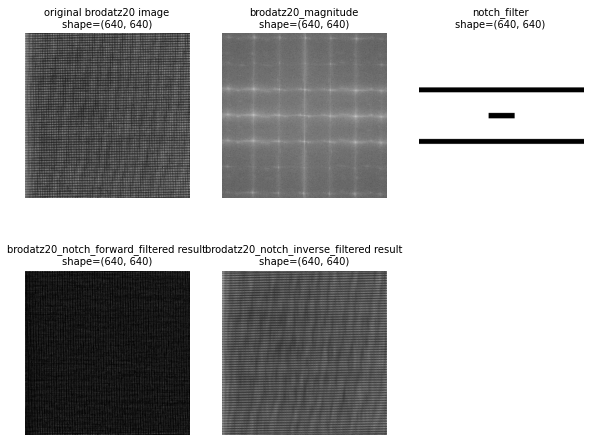

In [ ]:
import numpy as np
import cv2
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def notch_filter_generation(nr,nc,row_range, center_range):
#------------------------- Code Here ------------------------------       
    notch = np.zeros( [ nr, nc ] )
    for x in range( nr ):
        for y in range( nc ):
            if ( x < row_range or x > nr - row_range ) and ( y < center_range or y > nc - center_range ):
                notch[x,y] = 255 
#------------------------- Stop Here ------------------------------                   
    return notch        

def notch_filter_generation2(nr,nc,row_range, center_range):
#------------------------- Code Here ------------------------------       
    notch = np.zeros( [ nr, nc ] )
    for x in range( nr ):
        for y in range( nc ):
            if ( x < row_range or x > nr - row_range ) and ( y < center_range or y > nc - center_range ):
                notch[x,y] = 255
            if ( x < row_range or x > nr - row_range ) and ( y < nc - center_range or y > center_range ):
                notch[x,y] = 255
#------------------------- Stop Here ------------------------------                   
    return notch 

def notch_filtering(f, notch, d_type):
    # type = 1: forward filter, type = 0: inverse filter
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-Processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) 
    G = F.copy( )

 # perform notch filtering
    for u in range( nr ):
        for v in range( nc ):
            if d_type == 1:
                G[u,v] *= notch[u,v]/255  
            else:
                G[u,v] *= (1-notch[u,v]/255)    

    gp = ifft2( G ) # Inverse Discrete Fourier Transform
    gp2 = np.zeros( [ nr, nc ] ) # Post-Processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = 20 * np.log( np.abs( Fshift ) + 1 )
    mag = mag / mag.max( ) * 255.0
    g = np.uint8( mag )
    return g

def main( ):
    img = cv2.imread( "brodatz20.bmp", -1 )
    magnitude = spectrum( img )
    
    nr, nc = img.shape[:2]
    row_range = 10
    center_range = 50
    notch_filter = notch_filter_generation2(nr,nc,row_range, center_range)
    img2 = notch_filtering( img ,notch_filter,1)
    img3 = notch_filtering( img ,notch_filter,0)

    display_fig_names = [
    "original brodatz20 image\nshape={}".format(img.shape),
    "brodatz20_magnitude\nshape={}".format(magnitude.shape),  
    "notch_filter\nshape={}".format(notch_filter.shape), 
    "brodatz20_notch_forward_filtered result\nshape={}".format(img2.shape), 
    "brodatz20_notch_inverse_filtered result\nshape={}".format(img3.shape),       
    ]
    display_img = [img, magnitude, notch_filter, img2,  img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 3, i+1)
        plot_image(display_img[i], title=display_fig_names[i]) 
    
main( )

## 4.7 1-D signal FFT analysis

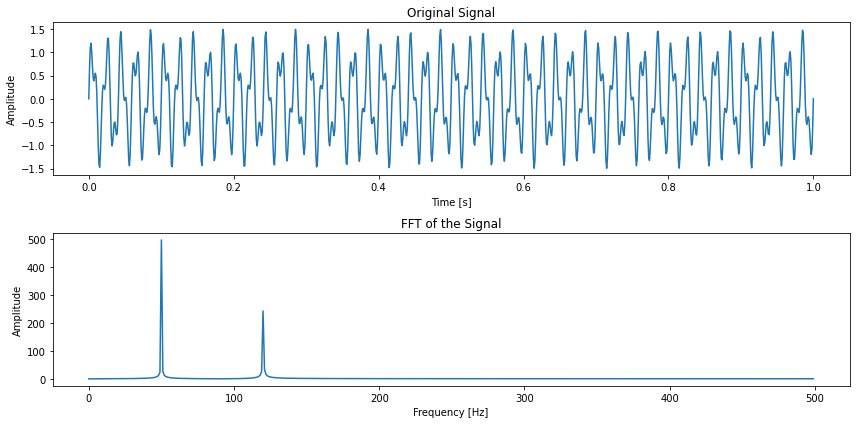

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

sampling_rate = 1000  
T = 1.0 / sampling_rate  # cycle
t = np.linspace(0.0, 1.0, sampling_rate)  

# generate a signal with 2 different frequency
f1 = 50.0   # the first frequency
f2 = 120.0  # the second frequency
signal = np.sin(f1 * 2.0 * np.pi * t) + 0.5 * np.sin(f2 * 2.0 * np.pi * t)

fft_result = fft(signal)
fft_freq = fftfreq(len(signal), T)

# only choose positive frequency
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_fft_result = fft_result[:len(fft_result)//2]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, np.abs(positive_fft_result))
plt.title('FFT of the Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## <font color="Red"> 4.8 Extract texture features from FFT coefficients
<font color="Red"> cancluate mean and standard deviation of an images' FFT coefficients

Mean: 185.60408590313003
Standard deviation: 21.374121386326596
Max value: 358.3721408693396
Min value: 71.90158816235245


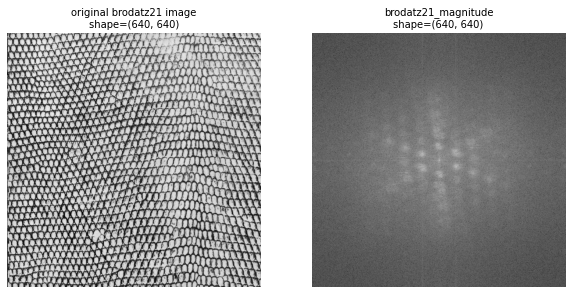

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def compute_fft_features(image):
#-------------------- Code Here  -------------------#  
    f = image.astype(np.float32)
    F = fft2(f)
    Fshift = fftshift(F)
    magnitude_spectrum = np.log(np.abs(Fshift) + 1)
    magnitude_spectrum = magnitude_spectrum / magnitude_spectrum.max() * 255.0
    mean_val = np.mean(magnitude_spectrum)
    std_val = np.std(magnitude_spectrum)
    max_val = np.max(magnitude_spectrum)
    min_val = np.min(magnitude_spectrum)
#-------------------- Stop Here  -------------------#      
    return magnitude_spectrum, mean_val, std_val, max_val, min_val

image = cv2.imread('brodatz21.bmp', cv2.IMREAD_GRAYSCALE)

nr,nc = image.shape[:2]
magnitude_spectrum, mean_val, std_val, max_val, min_val = compute_fft_features(image)

print(f"Mean: {mean_val}")
print(f"Standard deviation: {std_val}")
print(f"Max value: {max_val}")
print(f"Min value: {min_val}")

display_fig_names = [
"original brodatz21 image\nshape={}".format(image.shape),
"brodatz21_magnitude\nshape={}".format(magnitude_spectrum.shape),  
]
display_img = [image, magnitude_spectrum]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i]) 


## <font color="Red">4.9 Texture features distribution plotting
#### <font color="Red"> 1. Please find texture features(FFT mean and standard deviation) for every non-overlapped kxl from input textures(k and l are factors of image size m and n, respectively), brodatz14.bmp, brodatz16.bmp, brodatz20.bmp, brodat21.bmp.     
    
#### <font color="Red"> 2. plot features extracted from 4 texture images together by different color and label

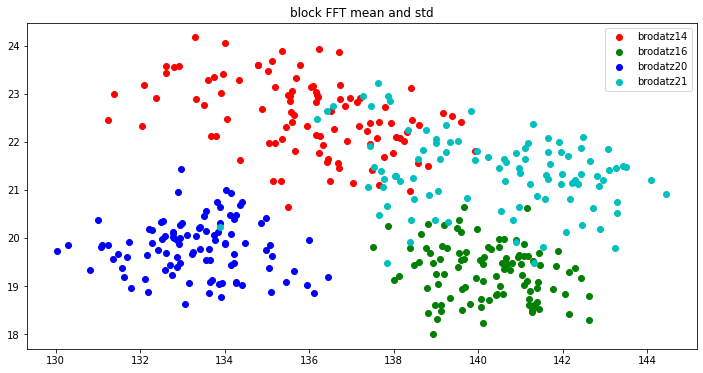

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def compute_fft_features(image):

    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  
#-------------------- Code Here  -------------------# 
    mean_val = np.mean(magnitude_spectrum)
    std_val = np.std(magnitude_spectrum)
    max_val = np.max(magnitude_spectrum)
    min_val = np.min(magnitude_spectrum)
#-------------------- Stop Here  -------------------#     
    return mean_val, std_val, max_val, min_val

def generate_image_features(image, k, l):
#-------------------- Code Here  -------------------#      
    nr, nc = image.shape[:2]
    imgFea = np.zeros((nr//k*nc//l, 2))
    idx = 0
    for i in range(0, nr, k):
        for j in range(0, nc, l):
            block = image[i:i+k, j:j+l]
            mean_val, std_val, max_val, min_val = compute_fft_features(block)
            imgFea[idx] = [mean_val, std_val]
            idx += 1
#-------------------- Stop Here  -------------------#             
    return imgFea

k = 64
l = 64
image = cv2.imread('brodatz14.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.figure(figsize=(12, 6))
plt.scatter(features[:,0], features[:,1], c = 'r',  label='brodatz14')
image = cv2.imread('brodatz16.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.scatter(features[:,0], features[:,1], c = 'g', label='brodatz16')
image = cv2.imread('brodatz20.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.scatter(features[:,0], features[:,1], c = 'b', label='brodatz20')
image = cv2.imread('brodatz21.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.scatter(features[:,0], features[:,1], c = 'c', label='brodatz21')
plt.legend()
plt.title("block FFT mean and std")
plt.show()

## <font color="Red">4.10 Texture features distribution plotting
#### <font color="Red"> 1. Please find texture features(mean and standard deviation) for every non-overlapped kxl from input textures(k and l are factors of image size m and n, respectively), brodatz14.bmp, brodatz16.bmp, brodatz20.bmp, brodat21.bmp.     
    
#### <font color="Red"> 2. plot features extracted from 4 texture images together by different color and label

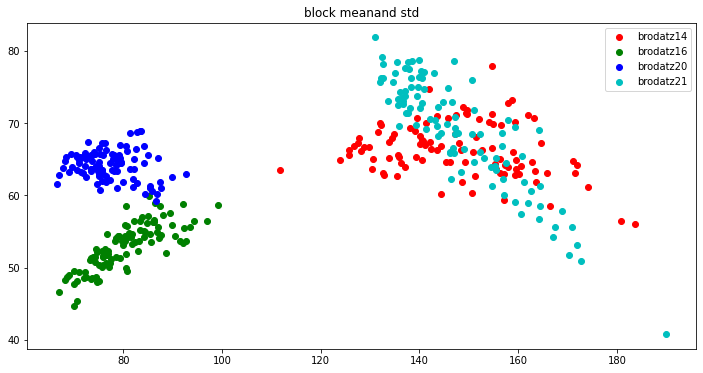

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def compute_fft_features(image):

    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  
    
    mean_val = np.mean(magnitude_spectrum)
    std_val = np.std(magnitude_spectrum)
    max_val = np.max(magnitude_spectrum)
    min_val = np.min(magnitude_spectrum)
    return mean_val, std_val, max_val, min_val

def generate_image_features(image, k, l):
#-------------------- Code Here  -------------------#     
    nr, nc = image.shape[:2]
    imgFea = np.zeros((nr//k*nc//l, 2))
    idx = 0
    for i in range(0, nr, k):
        for j in range(0, nc, l):
            block = image[i:i+k, j:j+l]
            mean_val, std_val, max_val, min_val = compute_fft_features(block)
            imgFea[idx] = [mean_val, std_val]
            idx += 1
#-------------------- Stop Here  -------------------#             
    return imgFea

k = 64
l = 64
image = cv2.imread('brodatz14.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.figure(figsize=(12, 6))
plt.scatter(features[:,0], features[:,1], c = 'r',  label='brodatz14')
image = cv2.imread('brodatz16.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.scatter(features[:,0], features[:,1], c = 'g', label='brodatz16')
image = cv2.imread('brodatz20.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.scatter(features[:,0], features[:,1], c = 'b', label='brodatz20')
image = cv2.imread('brodatz21.bmp', cv2.IMREAD_GRAYSCALE)
features = generate_image_features(image, k, l)
plt.scatter(features[:,0], features[:,1], c = 'c', label='brodatz21')
plt.legend()
plt.title("block meanand std")
plt.show()

## <font color="Red"> 4.11 use Python to sharpening an image through FFT
高頻增強： 透過高通濾波，增強影像的高頻成分，使影像更銳利。    
函數名稱:def fft_sharpen(img, s_range, alpha)
img: 輸入影像
s_range: 控制高頻的範圍(>s_range為高頻部分)
alpha: 高頻的強化倍數    

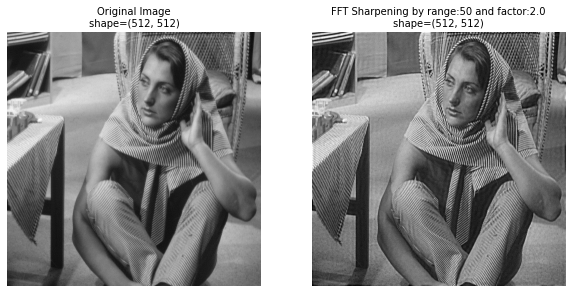

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def fft_sharpen(img, s_range, alpha):
#-------------------- Code Here  -------------------# 
    nr, nc = img.shape[:2]
    img = img.astype(np.float32)
    F = fft2(img)
    Fshift = fftshift(F)    
    H = np.ones((nr, nc), dtype=np.float32)
    for u in range(nr):
        for v in range(nc):
            dist = np.sqrt((u - nr / 2) ** 2 + (v - nc / 2) ** 2)
            if dist <= s_range:
                H[u, v] = 0

    G = Fshift * H
    G = G * alpha + Fshift * (1 - H)

    Gshift = ifftshift(G)
    g = ifft2(Gshift)
    g = np.real(g)

    img_back = np.uint8(np.clip(g, 0, 255))

#-------------------- Stop Here  -------------------# 
    return img_back


image = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)
s_range = 50
factor = 2.0
sharpening_mg = fft_sharpen(image, s_range, factor)

display_fig_names = [
"Original Image\nshape={}".format(image.shape),
"FFT Sharpening by range:"+str(s_range)+" and factor:"+str(factor)+"\nshape={}".format(sharpening_mg.shape),
]
display_img = [image, sharpening_mg]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])